## TEST for chromatin state sequence (CSS) conversion
remaining work
* create a class or a collection of functions for data extraction from all cells
* investigate on 

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from motif_utils import seq2kmer

In [40]:
filename='../database/bed/E017_15_coreMarks_stateno.bed'
cell_id='E017'

In [51]:
df_raw=pd.read_csv(filename, sep='\t', lineterminator='\n', header=None)
df_raw.head(10)

/home/lee/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3
0,chr1,0,9800,15
1,chr1,9800,10800,9
2,chr1,10800,13000,15
3,chr1,13000,13200,7
4,chr1,13200,16000,5
5,chr1,16000,17200,4
6,chr1,17200,19200,5
7,chr1,19200,79000,15
8,chr1,79000,93600,14
9,chr1,93600,540400,15


In [6]:
df=df_raw.rename(columns={0:"chromosome",1:"start",2:"end",3:"state"})
df.head()

,chromosome,start,end,state
0,chr1,0,9800,15
1,chr1,9800,10800,9
2,chr1,10800,13000,15
3,chr1,13000,13200,7
4,chr1,13200,16000,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635734 entries, 0 to 635733
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   chromosome  635734 non-null  object
 1   start       635734 non-null  object
 2   end         635734 non-null  object
 3   state       635734 non-null  object
dtypes: object(4)
memory usage: 19.4+ MB


In [8]:
len(df)

635734

In [9]:
df.tail(1)

,chromosome,start,end,state
635733,track,"name=""E017_15_coreMarks""","description=""",E017


In [10]:
df=df[:-1] # if deprecated, use df=df.iloc[:-1]

In [11]:
df.tail(1)

,chromosome,start,end,state
635732,chrY,59033400,59373400,15


In [12]:
df["start"]=pd.to_numeric(df["start"])
df["end"]=pd.to_numeric(df["end"])

In [13]:
df["start"].dtype

dtype('int64')

In [14]:
df["end"].dtype

dtype('int64')

In [15]:
df["state"].dtype

dtype('O')

In [16]:
df["state"]=pd.to_numeric(df["state"])
df["state"].dtype

dtype('int64')

In [17]:
df["length"]=df["end"]-df["start"]

In [18]:
df.head()

,chromosome,start,end,state,length
0,chr1,0,9800,15,9800
1,chr1,9800,10800,9,1000
2,chr1,10800,13000,15,2200
3,chr1,13000,13200,7,200
4,chr1,13200,16000,5,2800


In [19]:
df["unit"]=(df["length"]/100).astype(int)

In [20]:
df.head()

,chromosome,start,end,state,length,unit
0,chr1,0,9800,15,9800,98
1,chr1,9800,10800,9,1000,10
2,chr1,10800,13000,15,2200,22
3,chr1,13000,13200,7,200,2
4,chr1,13200,16000,5,2800,28


In [21]:
df["unit"].dtype

dtype('int64')

In [22]:
state_dict={
    1:"A", 2:"B", 3:"C", 4:"D", 5:"E",6:"F",7:"G",8:"H" ,9:"I" ,
    10:"J",11:"K", 12:"L", 13:"M", 14:"N", 15:"O"
}

In [23]:
print(state_dict)

{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O'}


In [24]:
df["state_seq"]=df["state"].map(state_dict)
df.head()

,chromosome,start,end,state,length,unit,state_seq
0,chr1,0,9800,15,9800,98,O
1,chr1,9800,10800,9,1000,10,I
2,chr1,10800,13000,15,2200,22,O
3,chr1,13000,13200,7,200,2,G
4,chr1,13200,16000,5,2800,28,E


<AxesSubplot:>

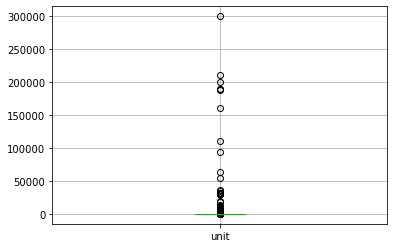

In [25]:
df.boxplot(column="unit")

array([[<AxesSubplot:title={'center':'unit'}>]], dtype=object)

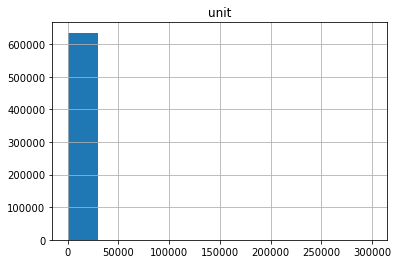

In [26]:
df.hist(column="unit")

In [27]:
df["state"][(df["unit"]<100)&(df["unit"]>50)].describe()

count    69601.000000
mean        10.951624
std          4.393481
min          1.000000
25%          5.000000
50%         14.000000
75%         15.000000
max         15.000000
Name: state, dtype: float64

In [28]:
df["state"][df["unit"]>5000].describe()

count    48.0
mean     15.0
std       0.0
min      15.0
25%      15.0
50%      15.0
75%      15.0
max      15.0
Name: state, dtype: float64

In [29]:
len(df["state"][df["unit"]>10000])

37

In [30]:
df["unit"].describe()

count    635733.000000
mean         48.694836
std         757.183796
min           2.000000
25%           6.000000
50%          16.000000
75%          42.000000
max      300004.000000
Name: unit, dtype: float64

In [31]:
df_first10=df.head(10)

In [32]:
df["state_seq_full"]=df["unit"]*df["state_seq"]

In [33]:
df.head()

,chromosome,start,end,state,length,unit,state_seq,state_seq_full
0,chr1,0,9800,15,9800,98,O,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
1,chr1,9800,10800,9,1000,10,I,IIIIIIIIII
2,chr1,10800,13000,15,2200,22,O,OOOOOOOOOOOOOOOOOOOOOO
3,chr1,13000,13200,7,200,2,G,GG
4,chr1,13200,16000,5,2800,28,E,EEEEEEEEEEEEEEEEEEEEEEEEEEEE


In [34]:
df["state_seq_full"].head(10)

0    OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
1                                           IIIIIIIIII
2                               OOOOOOOOOOOOOOOOOOOOOO
3                                                   GG
4                         EEEEEEEEEEEEEEEEEEEEEEEEEEEE
5                                         DDDDDDDDDDDD
6                                 EEEEEEEEEEEEEEEEEEEE
7    OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
8    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
9    OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
Name: state_seq_full, dtype: object

In [35]:
df["state_seq_full"].describe()

count     635733
unique      3205
top           GG
freq       21819
Name: state_seq_full, dtype: object

#### The sequence number resets for new chromosome
What is the statistics of the total sequence numeber for each chromosome?

In [73]:
df[["start","end"]].loc[df["chromosome"]=="chr1"].tail()

,start,end
53436,249212600,249217800
53437,249217800,249221600
53438,249221600,249239200
53439,249239200,249240200
53440,249240200,249250600


In [75]:
df[["start","end"]].loc[df["chromosome"]=="chr2"].head()

,start,end
53441,0,10000
53442,10000,12200
53443,12200,28000
53444,28000,48200
53445,48200,54000


In [177]:
# To collect the number of sequences for each chromosome, scan the start column
total_row=len(df)
chr_len=[]
chr_check=[]
chr_index=[]

for i in range(total_row):
    if (df["start"].iloc[i]==0) & (i >0):
        chr_len.append(df["end"].iloc[i-1])
        chr_check.append(df["start"].iloc[i]) # assert
        chr_index.append(i-1)


end_len=df["end"].iloc[-1]
end_index=total_row-1

chr_len.append(end_len)
chr_index.append(end_index)

In [182]:
assert len(chr_len)==df["chromosome"].nunique()
assert len(chr_index)==df["chromosome"].nunique()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

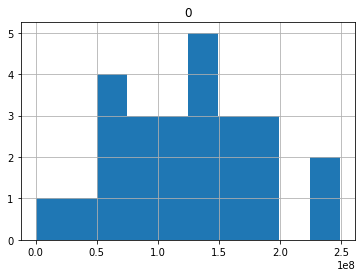

In [186]:
# distribution of the length of each chromosome
df_chr_len=pd.DataFrame(chr_len)
df_chr_len.hist()

In [196]:
df["chromosome"].iloc[0]

'chr1'

#### Separate the DF chromosome-wise

Create df_chr1 to df_chrY

In [211]:
# cut the stateSeq into piece of chromosome
# = concatenate only within the chromosome
# and then save it as an independent df

# state_seq_full_list=df["state_seq_full"].tolist()
# state_seq_full_to_str=''.join([elm for elm in state_seq_full_list ])

start=0
df_chr_list=[]
for index in chr_index:
    df_chr=df[start:index]
    chr_name=df["chromosome"].iloc[start] # string
    df_name='df_'+chr_name
    locals()[df_name]=df_chr
    df_chr_list.append(df_chr)
    start=index+1

In [240]:
def css_chr(df_chr):
    css_full_list=df_chr["state_seq_full"].tolist()
    css_full_to_str=''.join([elm for elm in css_full_list])
    return css_full_to_str

In [241]:
# chr_css_list contains the full css of each chrosome in a list
chr_css_list=[]
for df_chr in df_chr_list:
    css_full_to_str=css_chr(df_chr)
    chr_css_list.append(css_full_to_str)

In [243]:
len(chr_css_list)

25

In [249]:
# chr_css_newline stores the whole css, one line per a chromosome ?

# chr_css_newline='\n'.join([elm for elm in chr_css_list])

chr_css_newline='\n'.join(chr_css_list)

In [277]:
chr_css_newline.count("D")

1522846

In [276]:
chr_css_newline.count("E")

3865414

In [278]:
chr_css_newline.count("O")

15450196

In [284]:
state_enri_keys=list(state_dict.values())
state_enri_keys

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

In [285]:
state_enri_vals=[]
for state in list(state_dict.values()):
    enri=chr_css_newline.count(state)
    state_enri_vals.append(enri)

In [286]:
state_enri_dict=dict(zip(state_enri_keys, state_enri_vals))

In [287]:
state_enri_dict

{'A': 218760,
 'B': 104878,
 'C': 24296,
 'D': 1522846,
 'E': 3865414,
 'F': 291038,
 'G': 1036130,
 'H': 85286,
 'I': 2620016,
 'J': 20162,
 'K': 20290,
 'L': 64542,
 'M': 1347564,
 'N': 4266296,
 'O': 15450196}

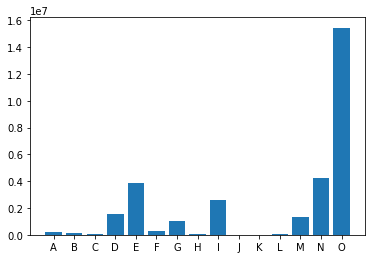

In [289]:
plt.bar(state_enri_keys,state_enri_vals)
plt.show()

#### The whole area is covered here? = genes are also annotated?
Yup, because the state **actively transcribed states**, which is represented as Tx and TxWk (state no. 4, 5 which corresponds to D, E), means it is the genic region.

In [267]:
# if end is different the next start
discrepancy=0
for i in range(len(df)-1): 
    if df["end"].iloc[i]!=df["start"].iloc[i+1]:
        discrepancy+=1

assert discrepancy+1==df["chromosome"].nunique()


In [257]:
df.iloc[53440:53442]

,chromosome,start,end,state,length,unit,state_seq,state_seq_full
53440,chr1,249240200,249250600,15,10400,104,O,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
53441,chr2,0,10000,15,10000,100,O,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...


In [268]:
df["chromosome"].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22',
       'chrM', 'chrX', 'chrY'], dtype=object)

In [76]:
# test the string maker (df to list, list to str)
state_seq_list=df["state_seq"].tolist()
state_seq_to_str=''.join([elm for elm in state_seq_list ])

#### STATE seqeunce 
Apply the seq2kmer function from DNABERT utility to the state sequence string

In [37]:
# now apply to full state seq
state_seq_full_list=df["state_seq_full"].tolist()
state_seq_full_to_str=''.join([elm for elm in state_seq_full_list ])

In [49]:
len(state_seq_full_to_str)

30956914

In [39]:
kmers=seq2kmer(state_seq_full_to_str,6)

In [48]:
fname='../output/'+cell_id+'.txt'
with open(fname,'w') as f:
    f.write(kmers)

In [46]:
with open(fname) as f:
    firstline=f.readlines()[0].rstrip()
print(firstline)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

